# Grids

In this tutorial we will loook at the different Grids that are implemented in the framework. All grids can be used as well in the Standard Combination Technique, the Dimension Adaptive Combi Technique and the Spatial Adaptive Combi Technique. However some Spatial Adaptive Strategies do currently not support arbitrary distributions such as the CellMethod (which is restricted to Trapezoidal Grids).

## Trapezoidal Grid

In this example we will look at the most common Trapezoidal or Equidistant Grid which implements the trapezoidal rule for integration.

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution [0.16662818]
Analytic Solution 0.16666666666666663
Difference [3.84855732e-05]


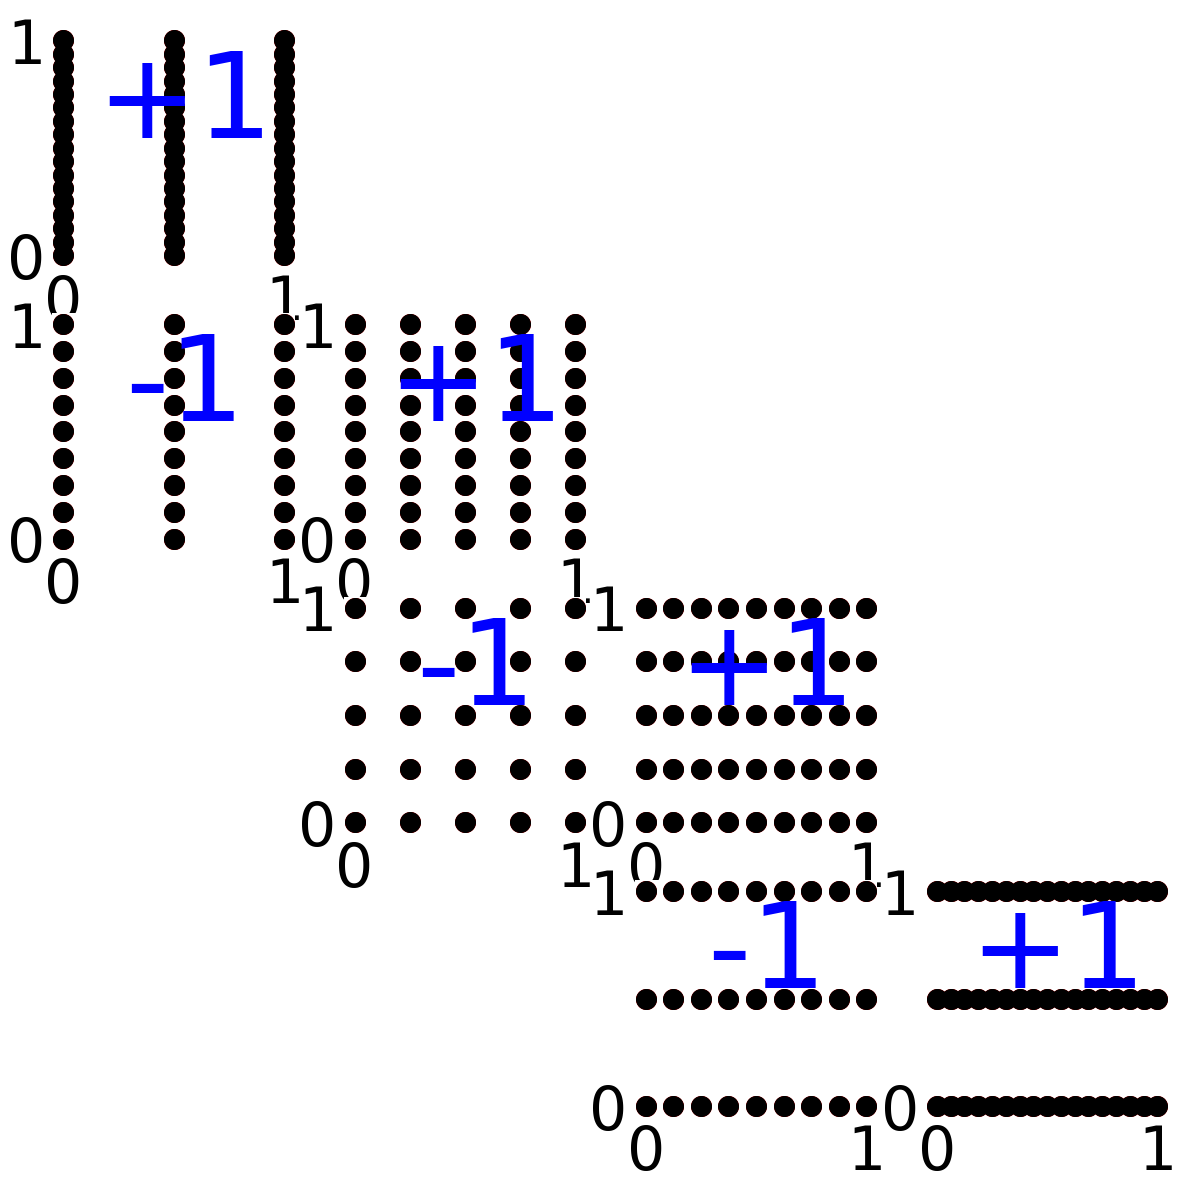

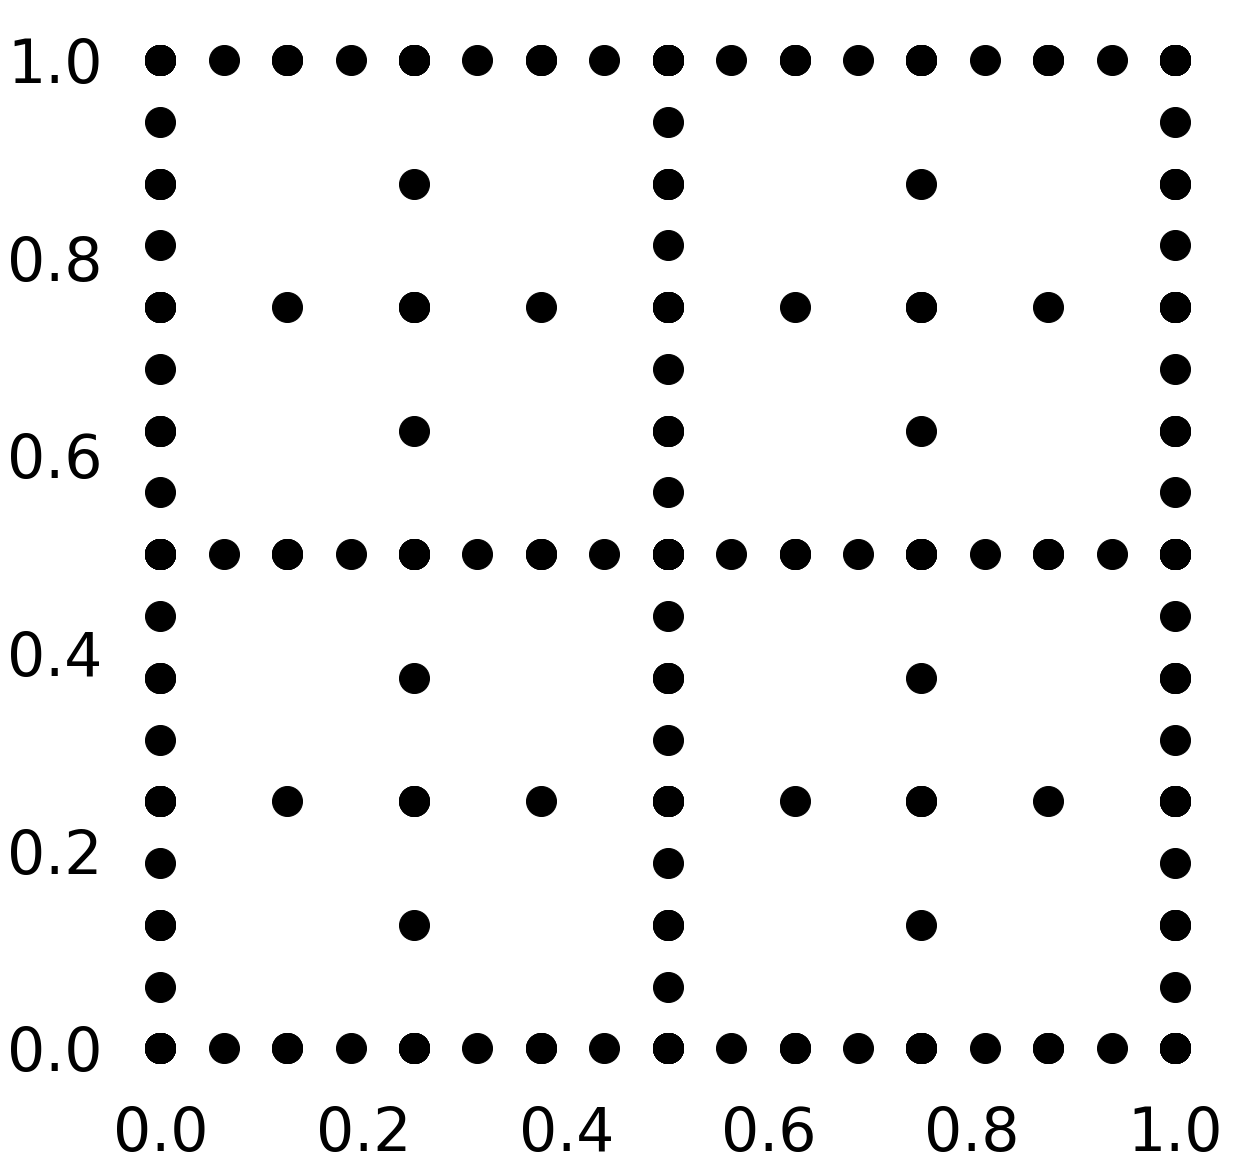

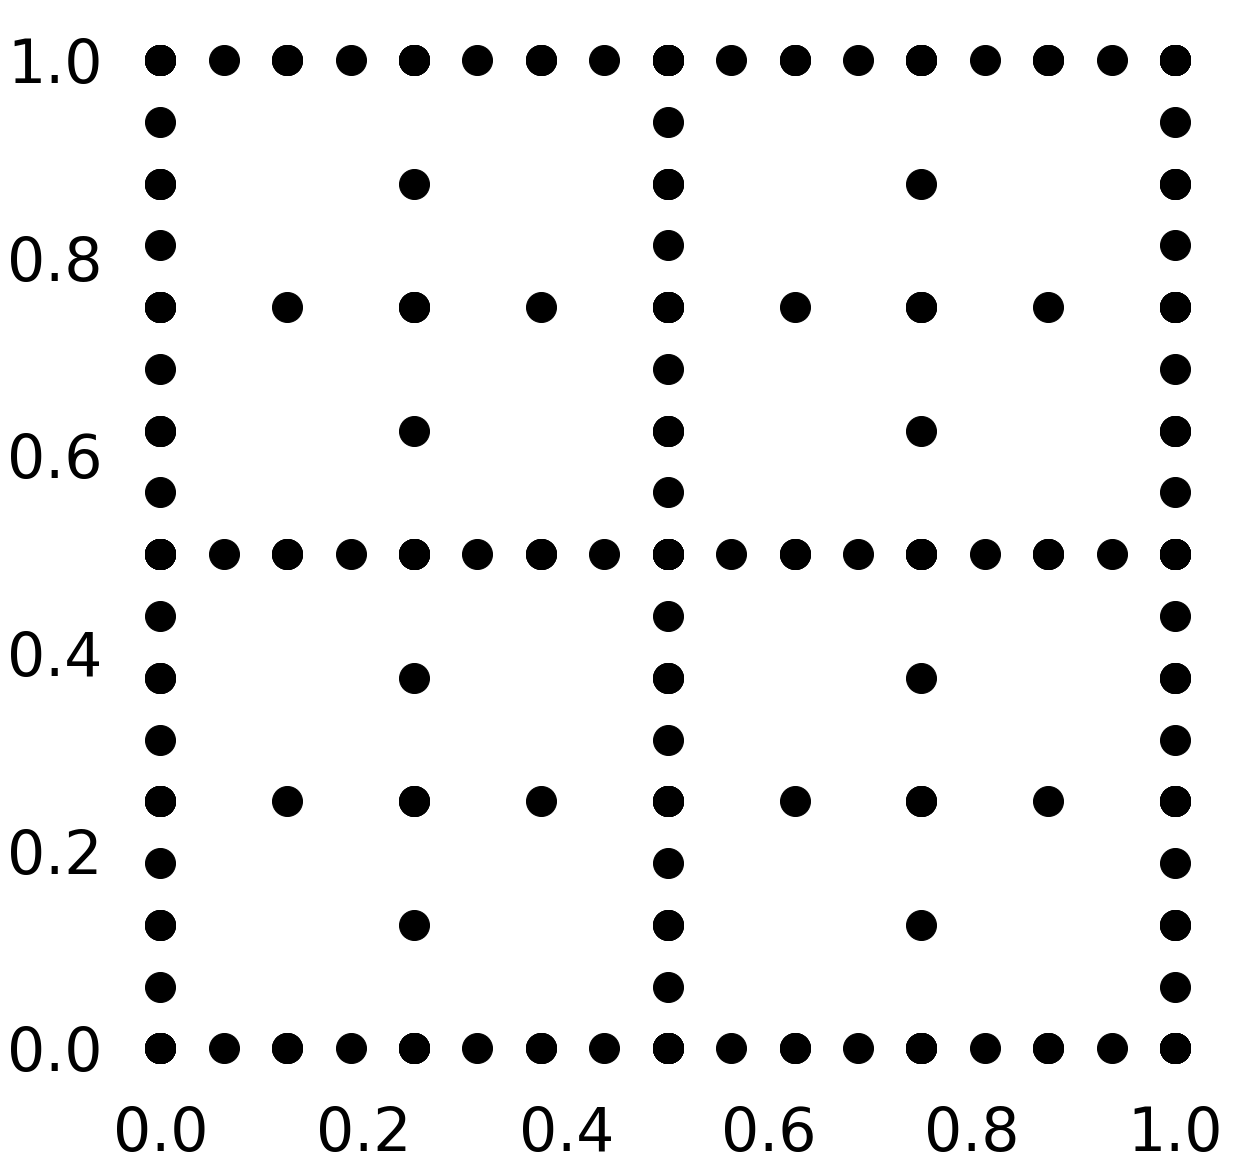

In [2]:
%matplotlib inline
from sys import path
path.append('../src/')

from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = TrapezoidalGrid(a=a, b=b)
f = GenzCornerPeak(coeffs=coeffs)
# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, f)
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()


## Clenshaw Curtis Grid

Clenshaw Curtis Grids use Chebyshev distributed grids with more points towards the boundaries. The method is exact for polynomials up to degree n-1 if we use n points in a 1D integration. One key feature in contrast to Gauss quadrature is that Clenshaw Curtis points are nested.

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution [0.16666656]
Analytic Solution 0.16666666666666663
Difference [1.0457708e-07]


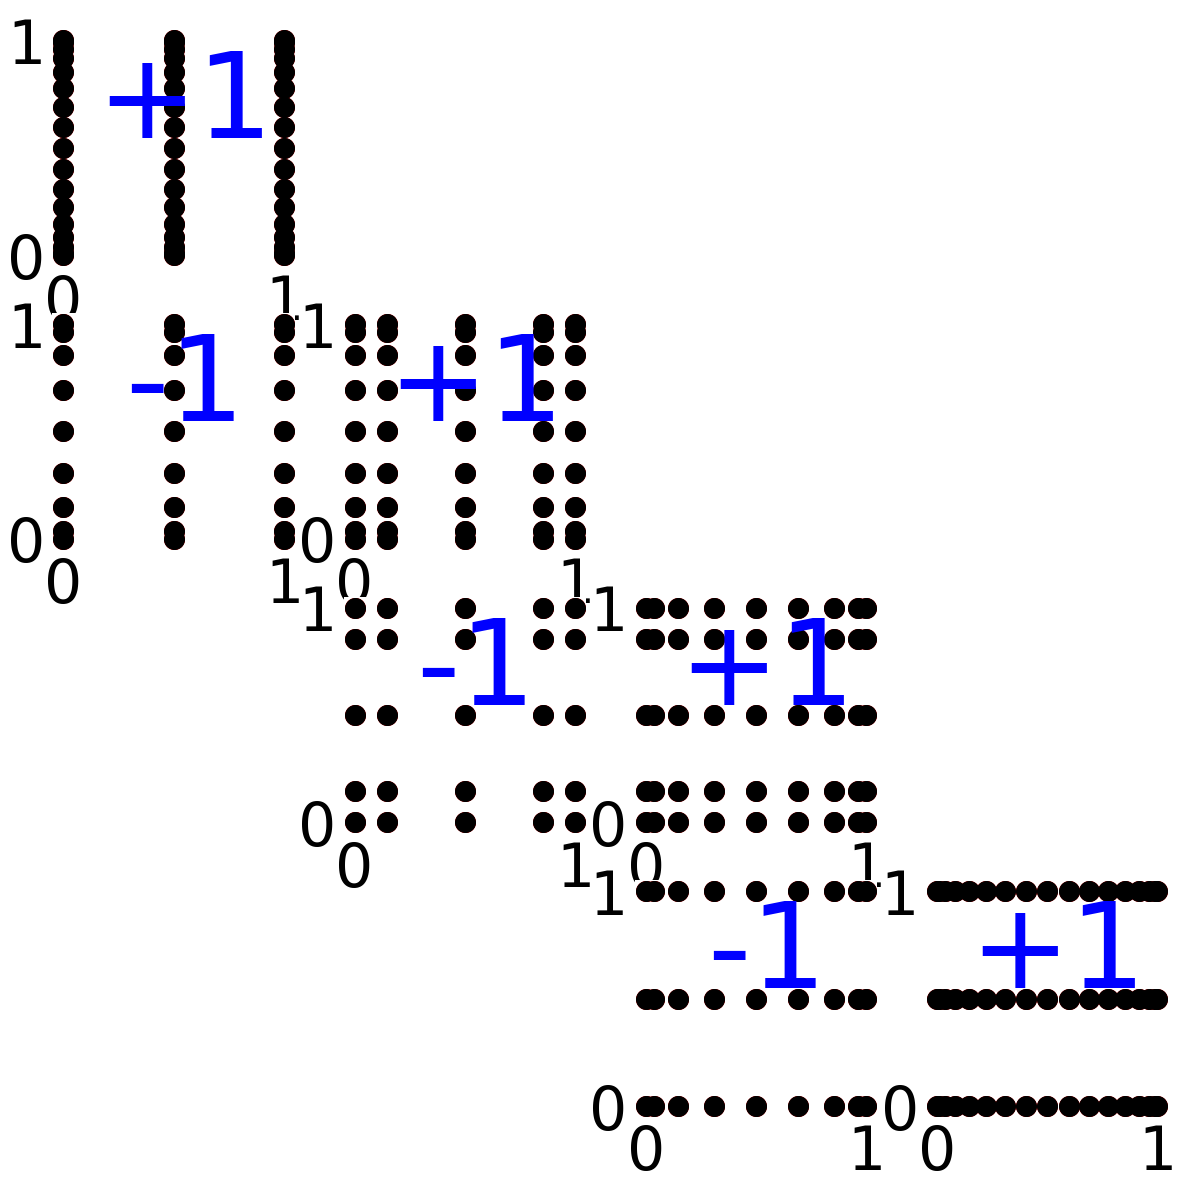

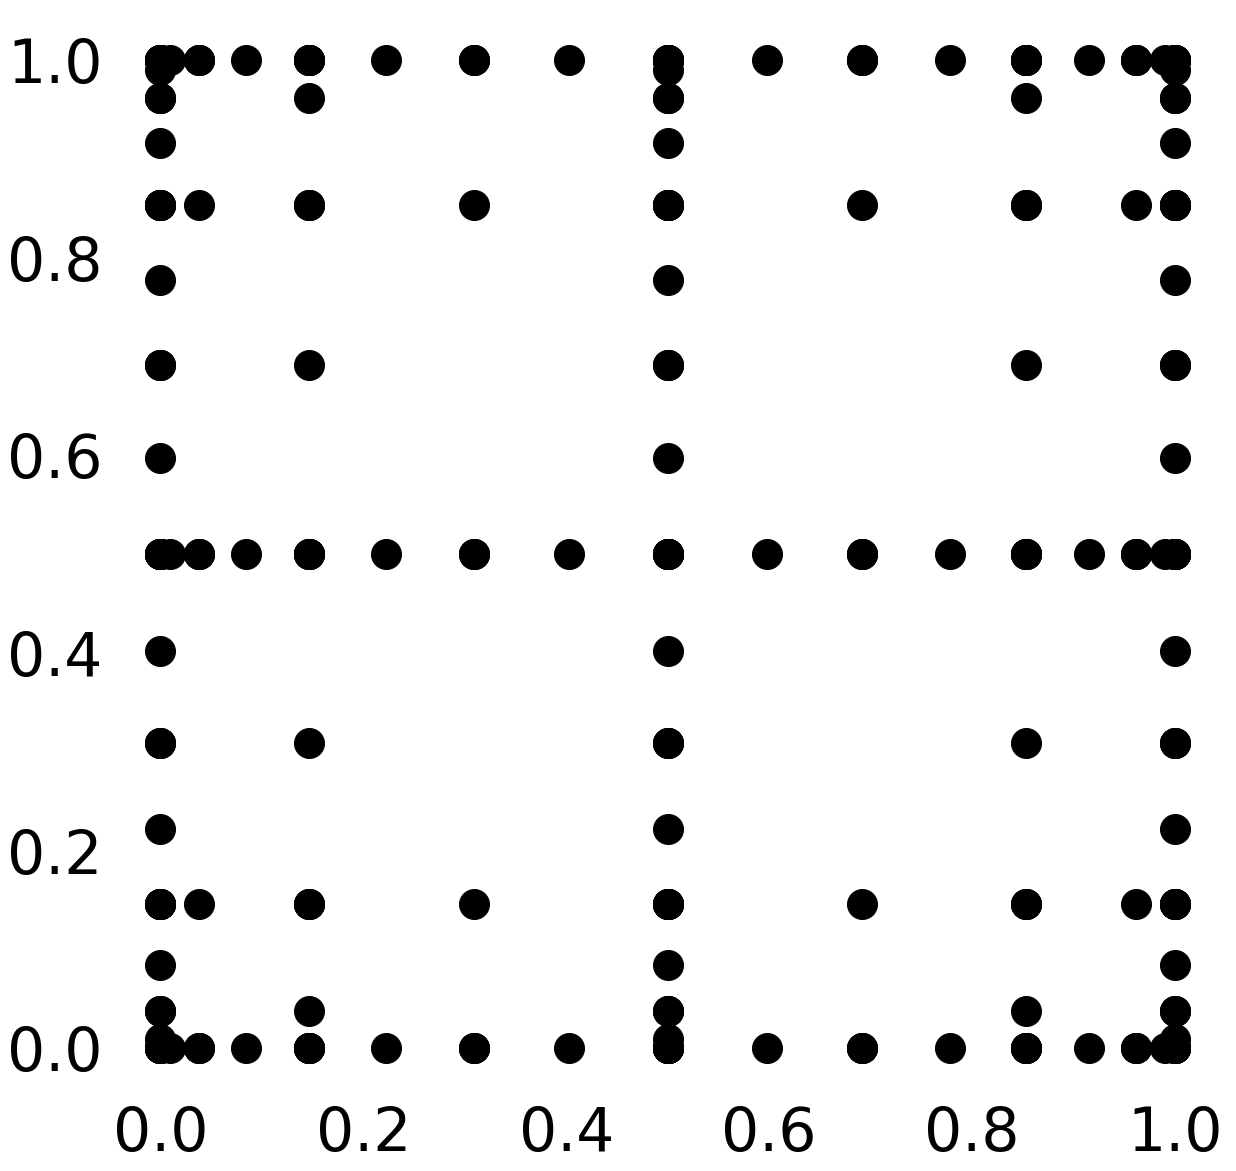

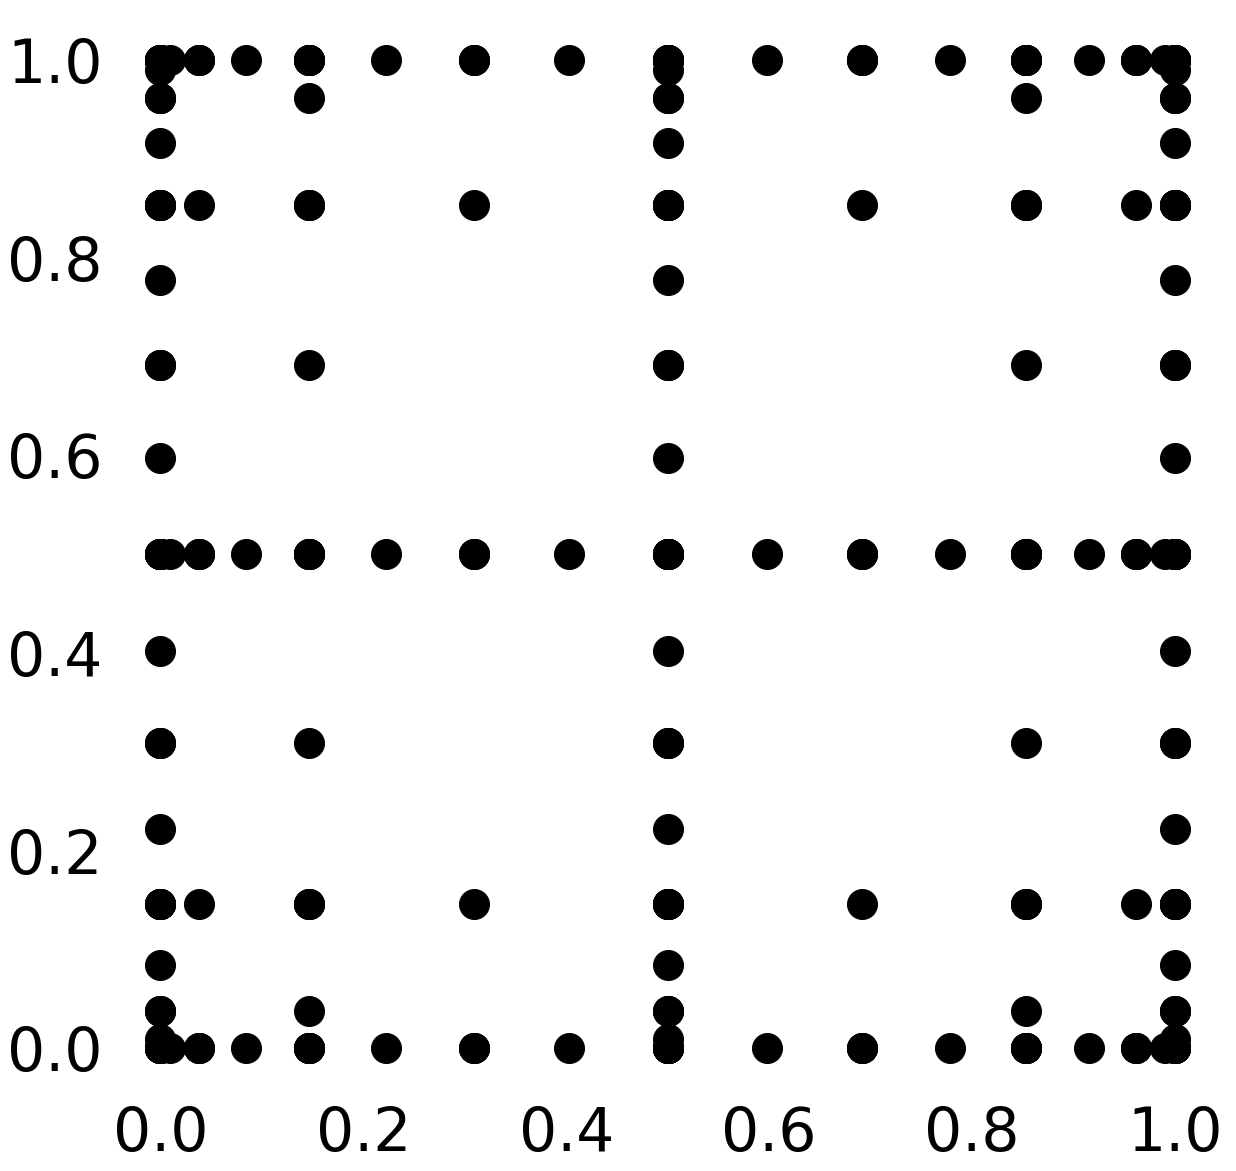

In [3]:
%matplotlib inline
from sys import path
path.append('../src/')

from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = ClenshawCurtisGrid(a=a, b=b)
f = GenzCornerPeak(coeffs=coeffs)
# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, f)
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()


## Gauss-Legendre Quadrature

Probably one of the most famous advanced quadrature rules which gives exact rules up to degree 2n-1 with n points in 1D. It is quite often used in scenarios where function evaluations are the most time consuming part and we want to spent as little points as possible to get good results. However, if the function is not smooth enough (or not even continous) Gauss Quadrature can also take a significant amount of points to get good results. One drawback in comparison the Clenshaw Curtis points is that the points of different levels are not nested for Gauss Quadrature.

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution [0.16666576]
Analytic Solution 0.16666666666666663
Difference [9.04011373e-07]


../src/Grid.py:223: RuntimeWarning: divide by zero encountered in double_scalars
  self.spacing = (end - start) / (self.num_points_with_boundary - 1)


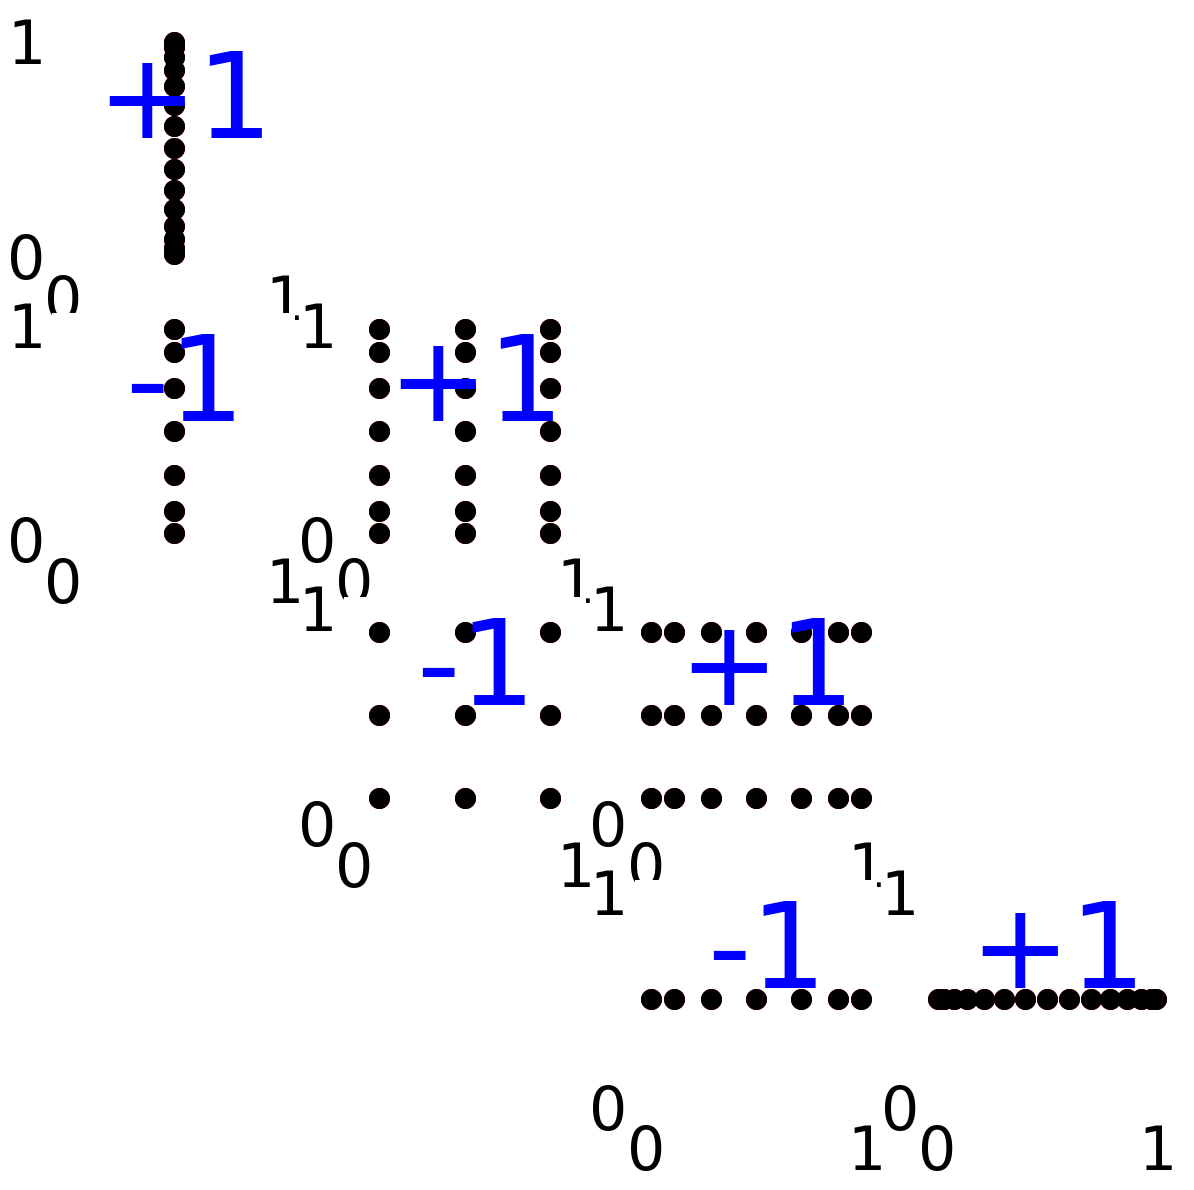

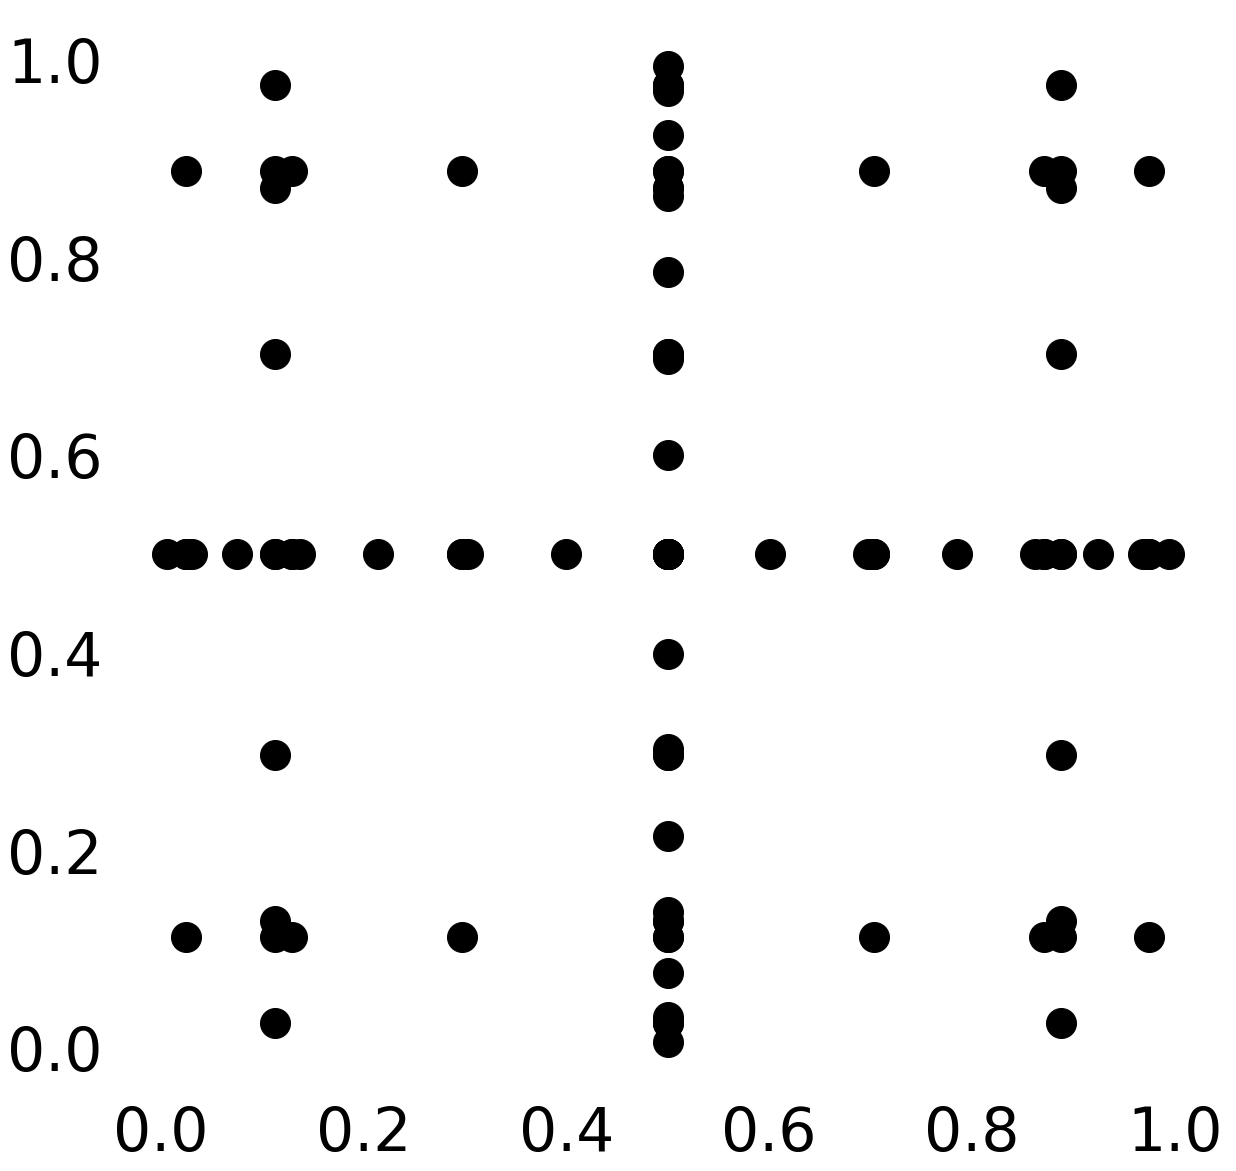

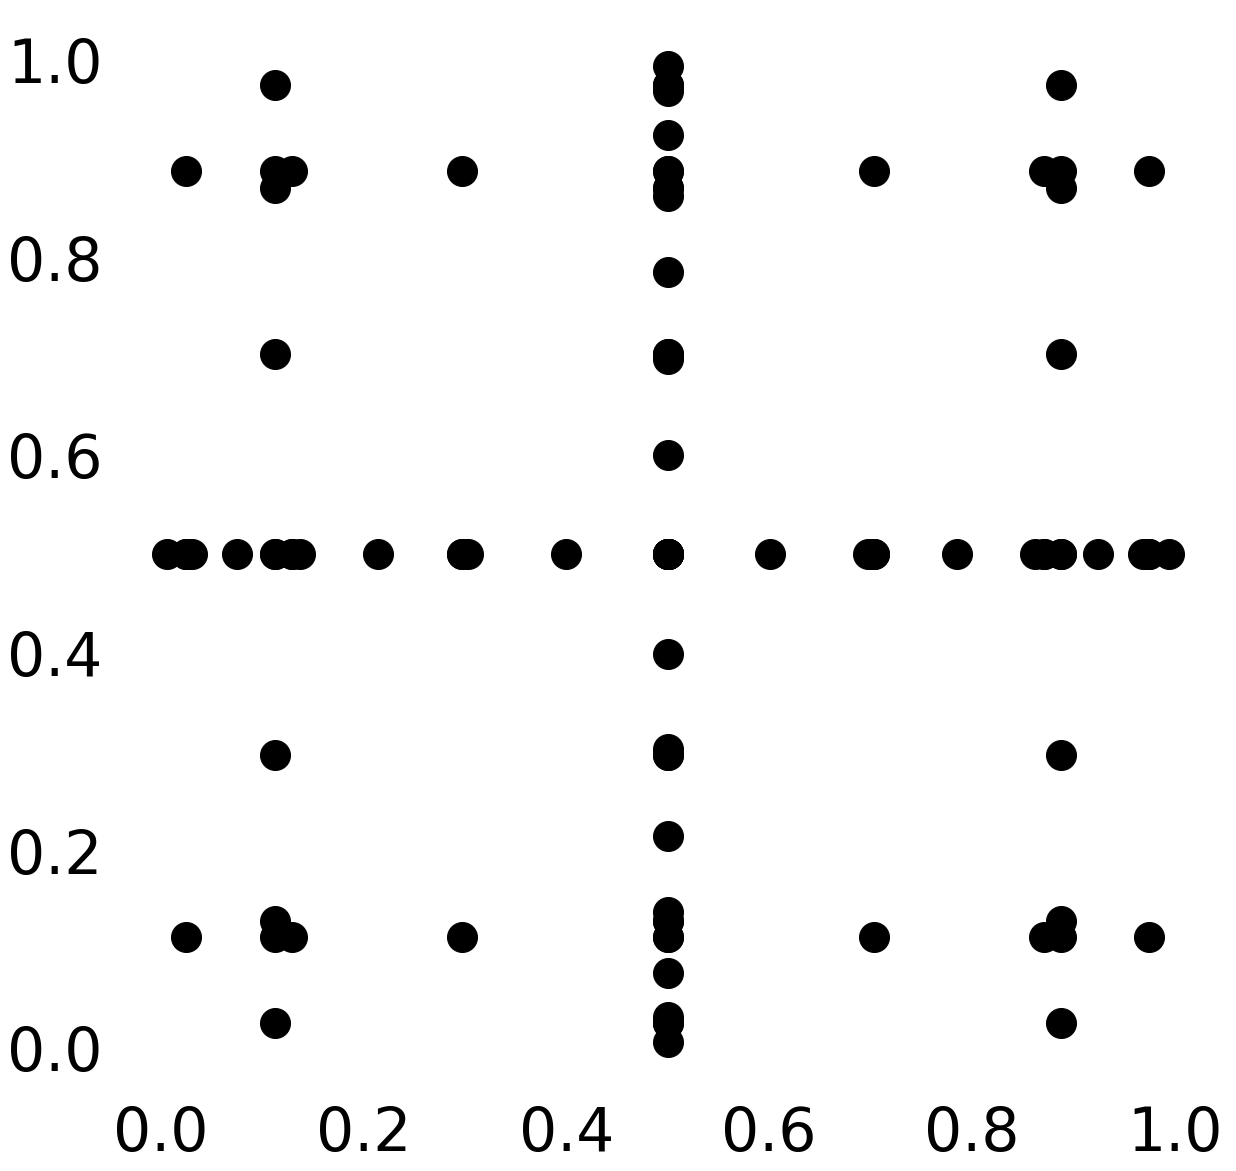

In [4]:
%matplotlib inline
from sys import path
path.append('../src/')

from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = GaussLegendreGrid(a=a, b=b)
f = GenzCornerPeak(coeffs=coeffs)
# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, f)
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()


## Leja Points

This grid type uses Leja points to build up the grid. One important difference to other schemes is that Leja points have a linear not exponential growth factor. That mean currently we always add 2 points if we go up 1 level insted of doubling the number of points. Typically Leja points have shown to be very effective when it comes to interpolating functions with few points.

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution [0.16666255]
Analytic Solution 0.16666666666666663
Difference [4.11497832e-06]


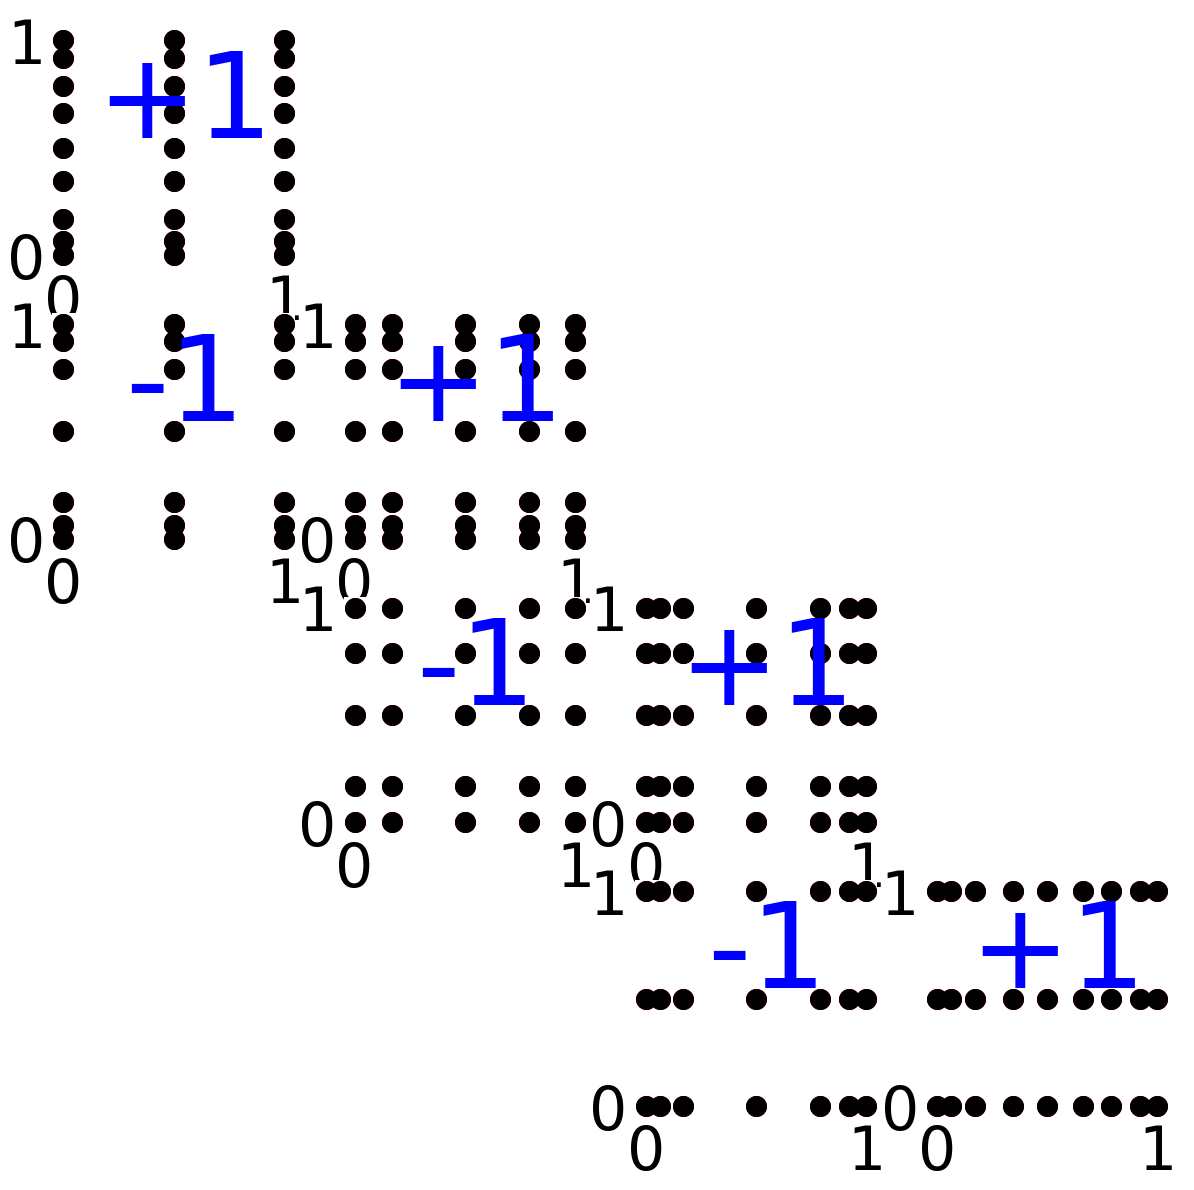

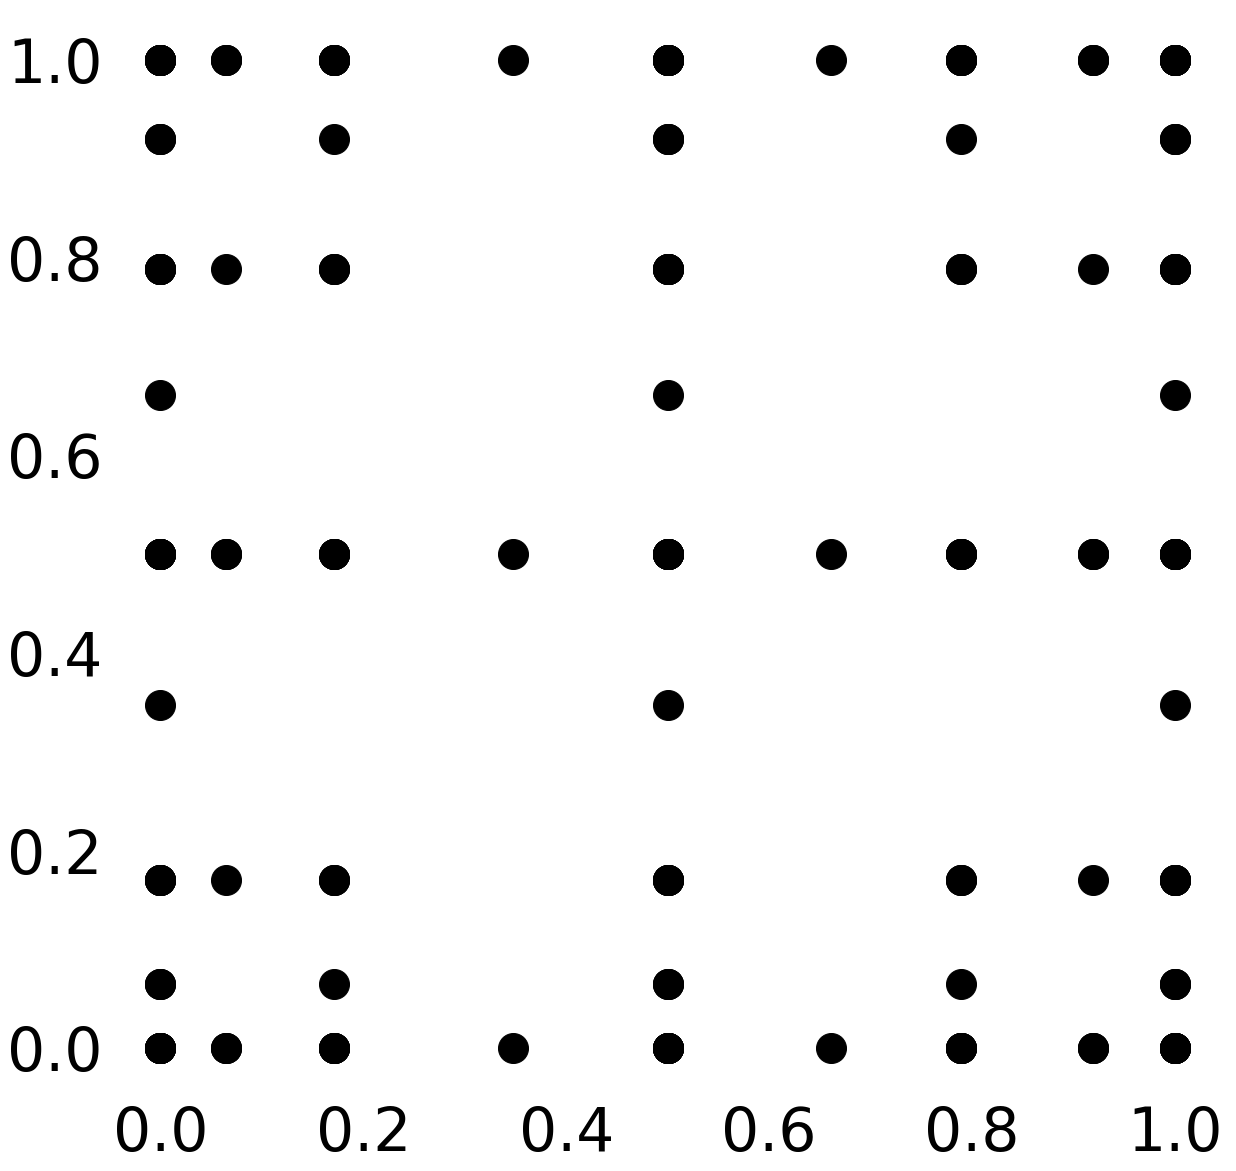

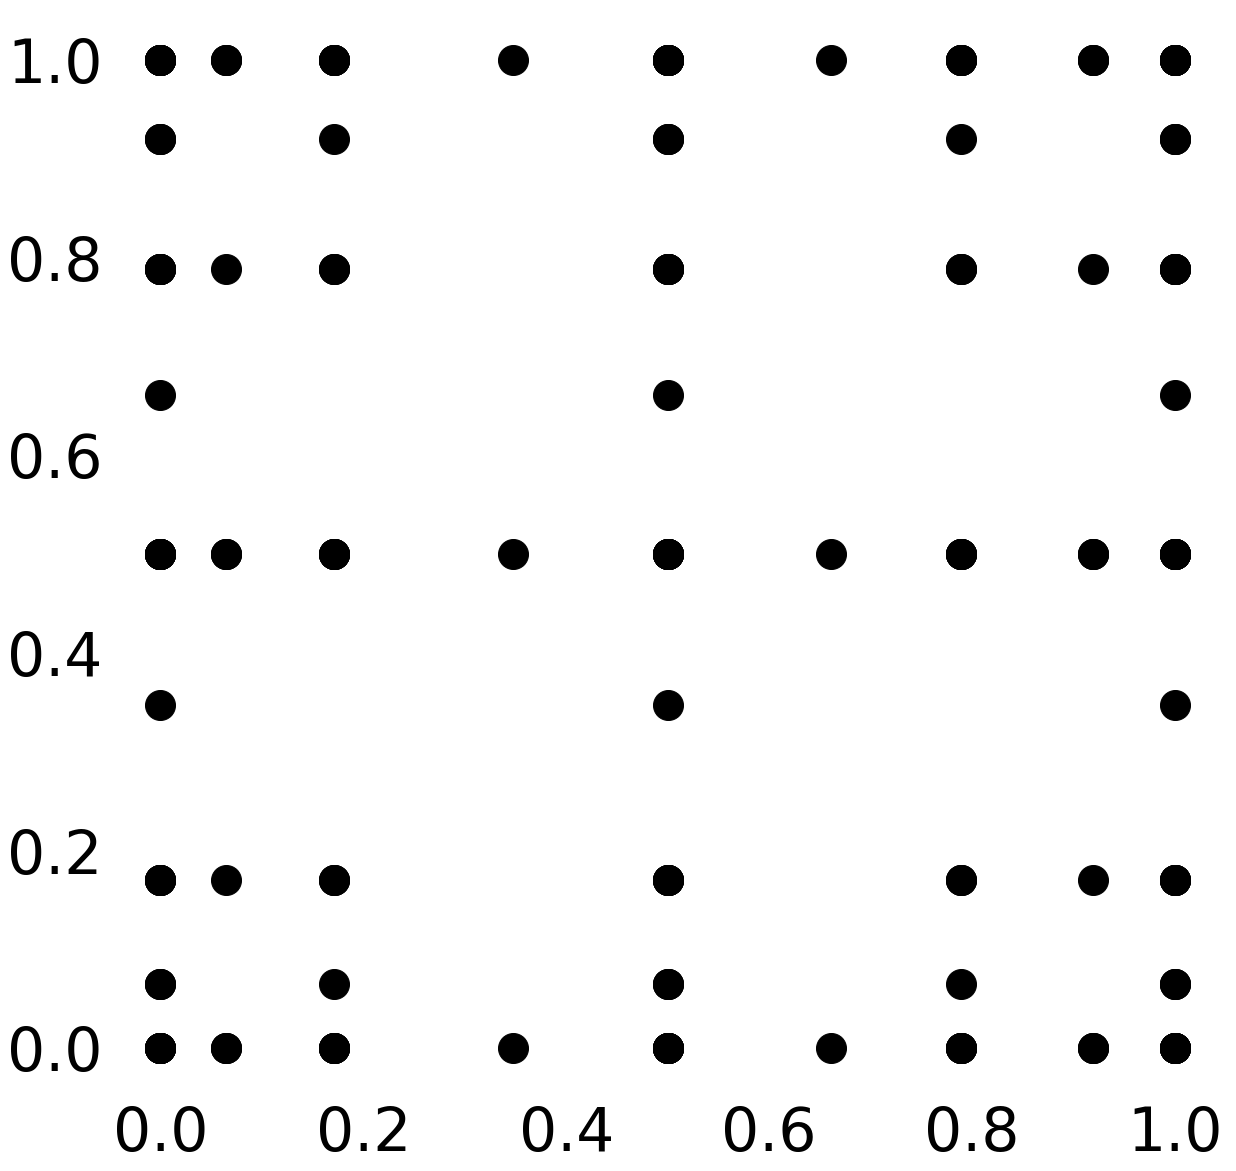

In [5]:
%matplotlib inline
from sys import path
path.append('../src/')

from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid = LejaGrid(a=a, b=b)
f = GenzCornerPeak(coeffs=coeffs)
# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, f)
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()


## Mixed Grids

It is now also possible to mix different grid distributions for different dimensions of our grid. We can use the MixedGrid Integration which calls the 1D routines for every dimension individually.  In the example below we use a Equidistant Trapezoidal grid in the x direction and a Clenshaw Curtis grid in the y direction.

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
CombiSolution [0.16687684]
Analytic Solution 0.16666666666666663
Difference [0.00021018]


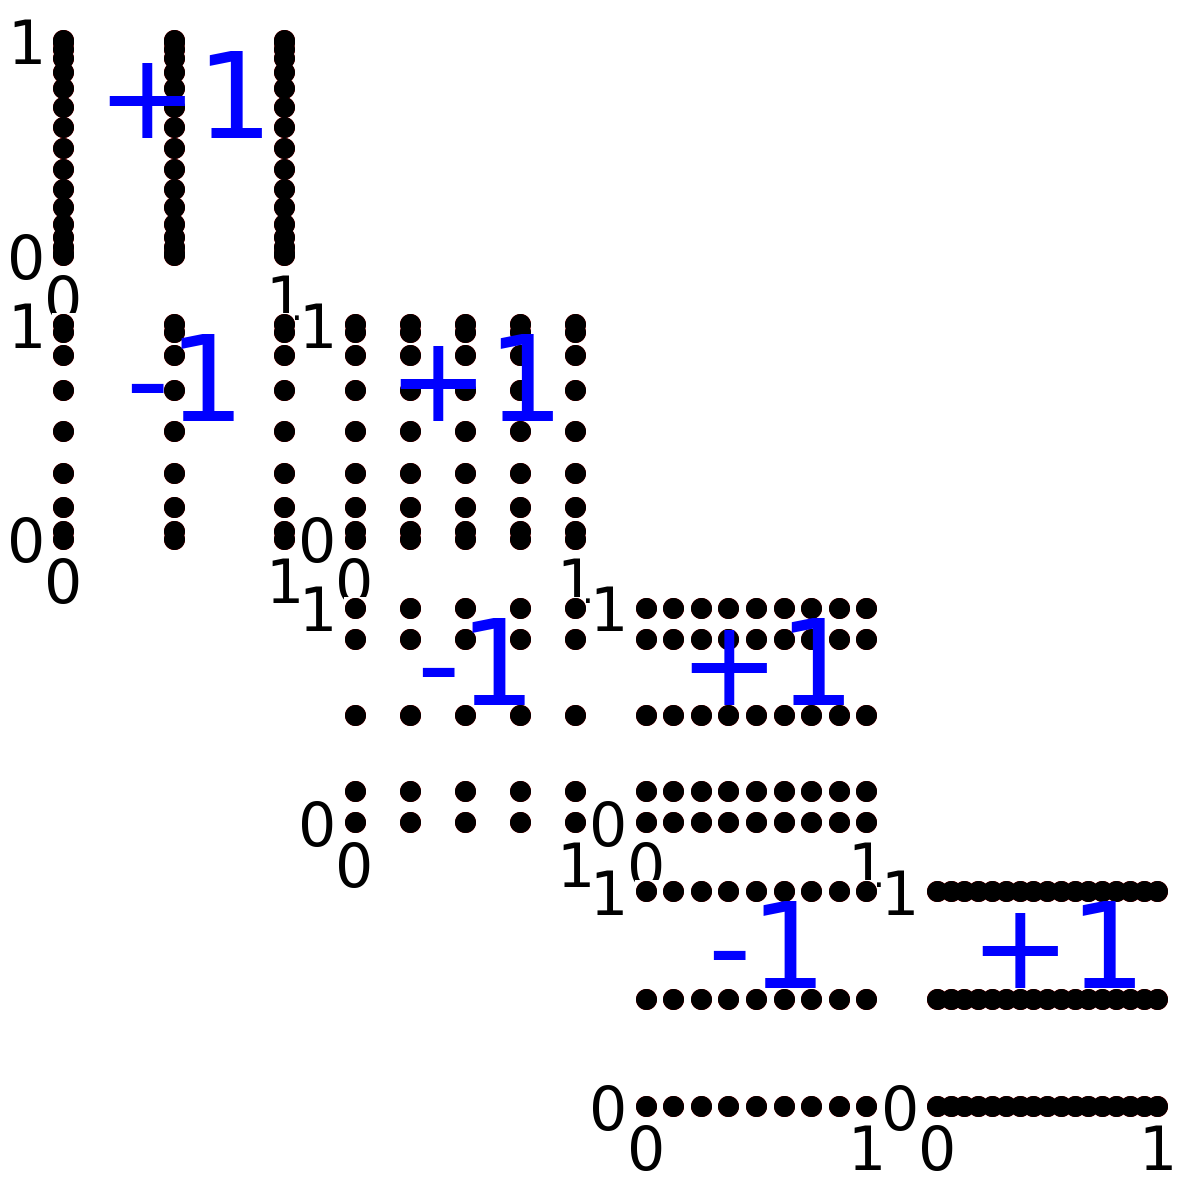

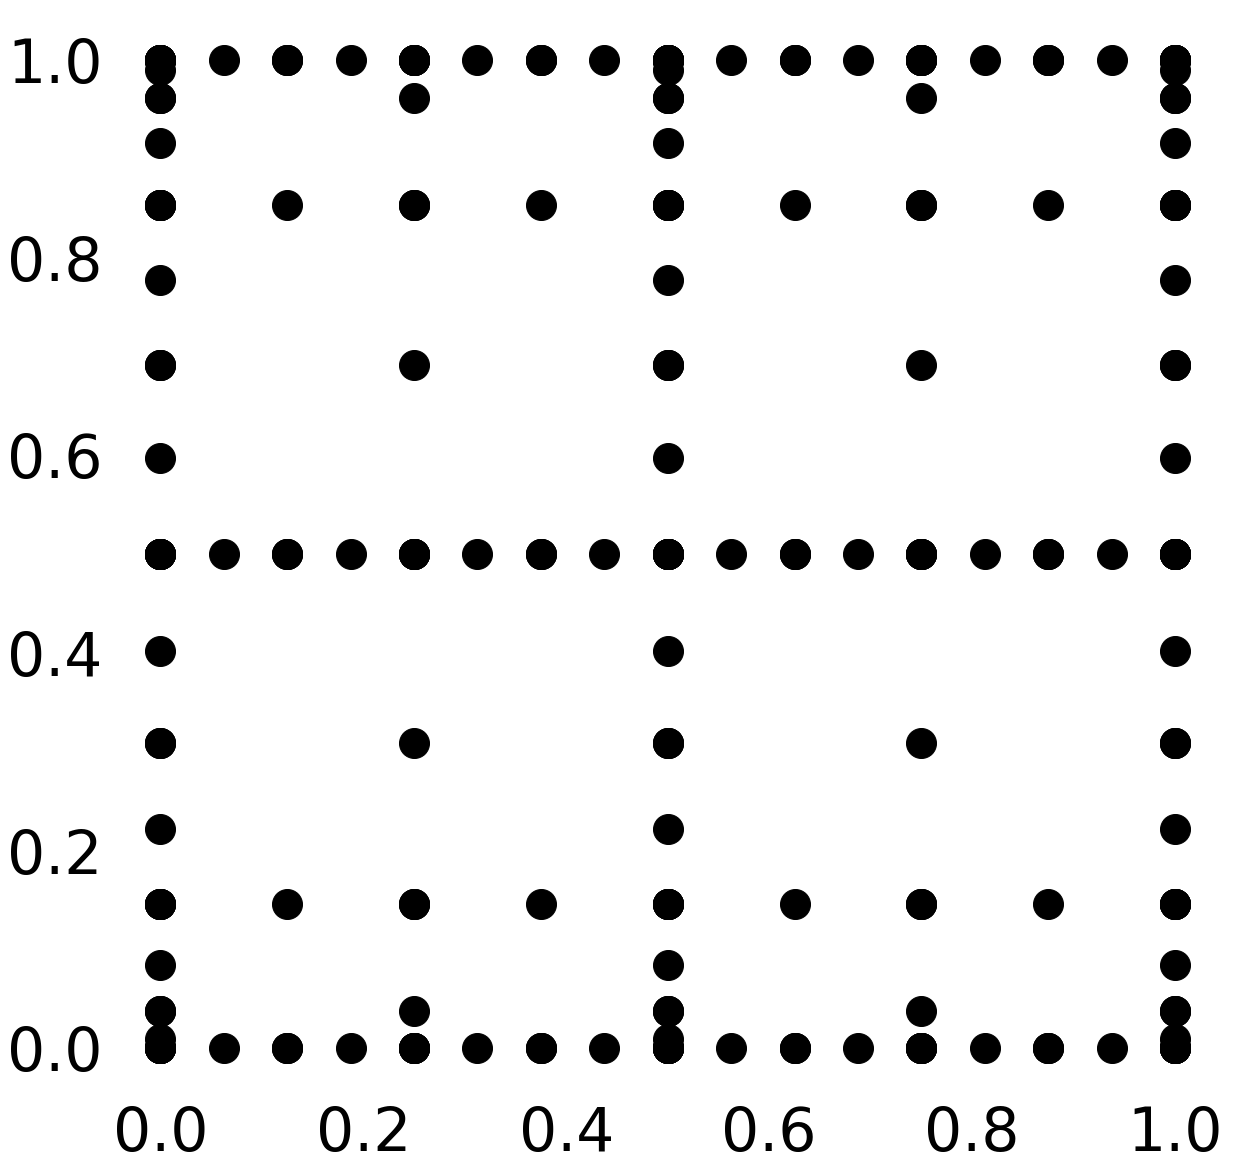

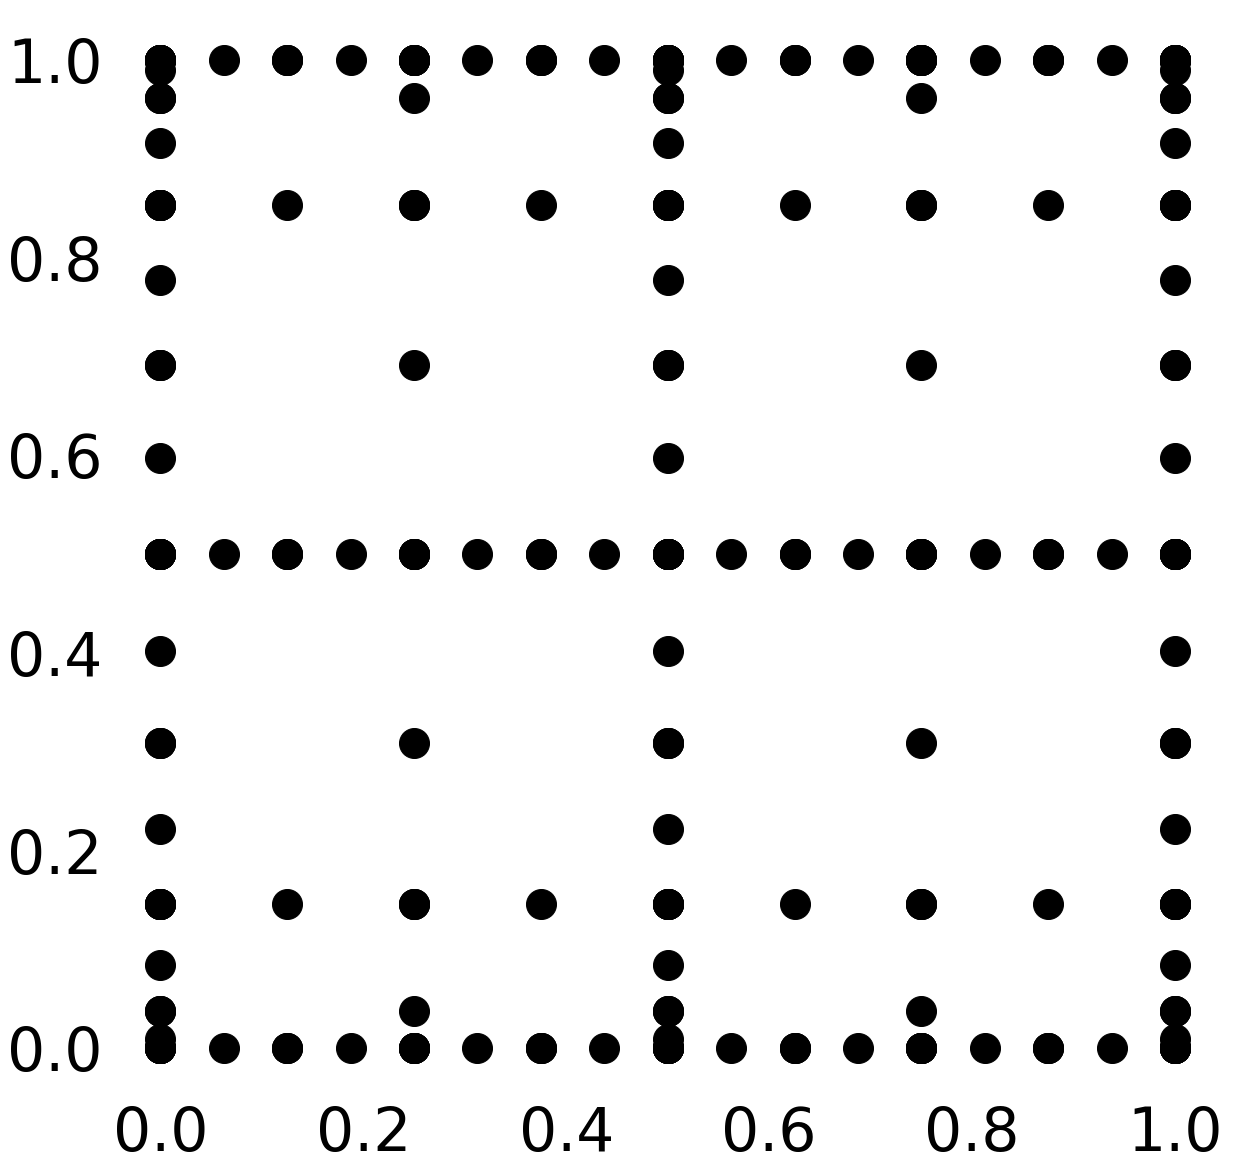

In [6]:
%matplotlib inline
from sys import path
path.append('../src/')

from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.zeros(dim)
b = np.ones(dim)
grid1 = TrapezoidalGrid1D(a[0],b[0])
grid2 = ClenshawCurtisGrid1D(a[0],b[0])
grids = [grid1,grid2]
grid=MixedGrid(a=a, b=b, grids=grids)
f = GenzCornerPeak(coeffs=coeffs)
# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=f, grid=grid, dim=dim, reference_solution = f.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 4
combiObject.perform_combi(minimum_level, maximum_level, f)
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()


## Special Grids for UQ

When it comes to Uncertainty Quantification one often aims to not just compute
$$\int_{x \in D} f(x) dx$$

but to include a probability distribution $\phi(x)$:
$$\int_{x \in D} \phi(x) f(x) dx$$

For these special problems better point distributions can be found such as Gauss points for the Truncated Normal distribution which can be seen below.

0 [1, 7] 1.0
1 [2, 6] 1.0
2 [3, 5] 1.0
3 [4, 4] 1.0
4 [5, 3] 1.0
5 [6, 2] 1.0
6 [7, 1] 1.0
7 [1, 6] -1.0
8 [2, 5] -1.0
9 [3, 4] -1.0
10 [4, 3] -1.0
11 [5, 2] -1.0
12 [6, 1] -1.0
CombiSolution [2.60917868]
Analytic Solution 2.6091786827487464
Difference [3.87716526e-11]


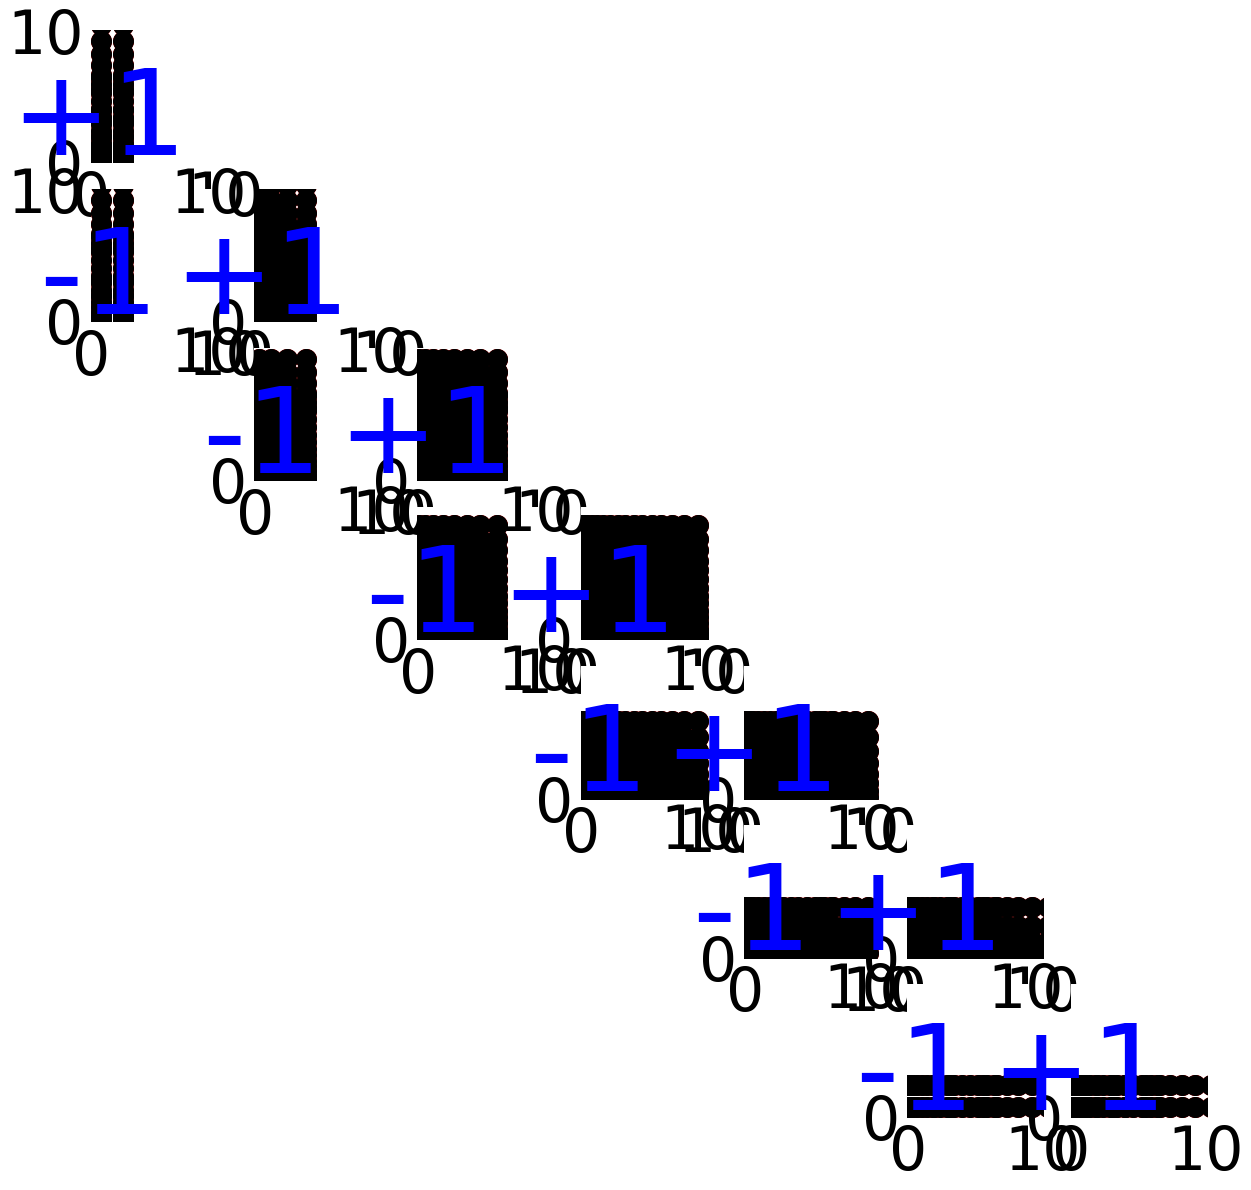

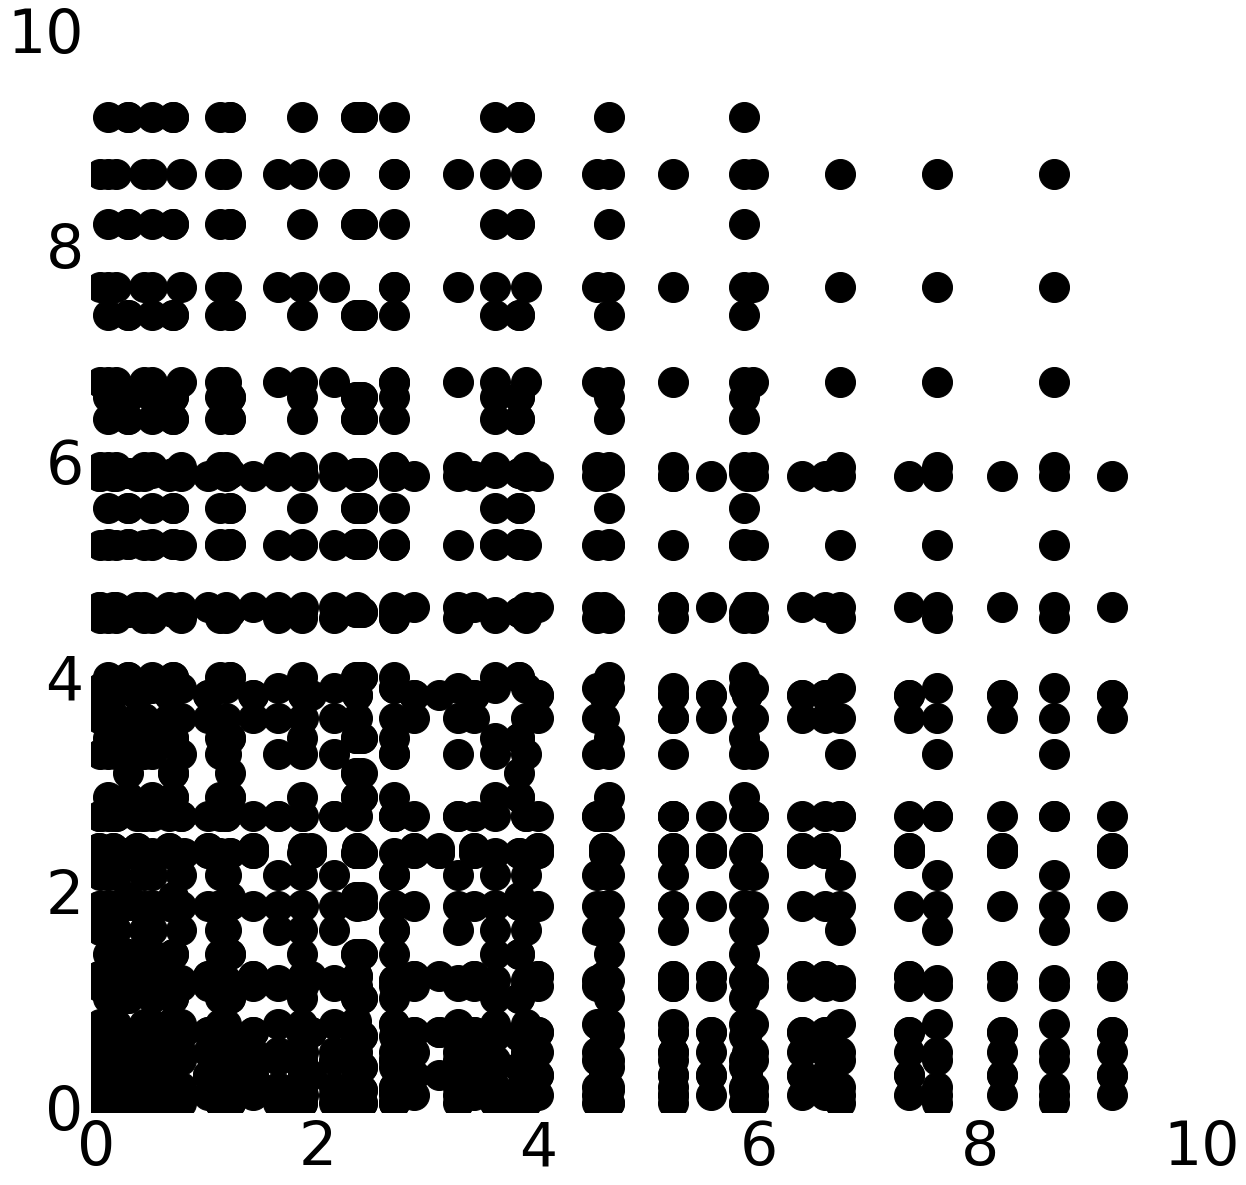

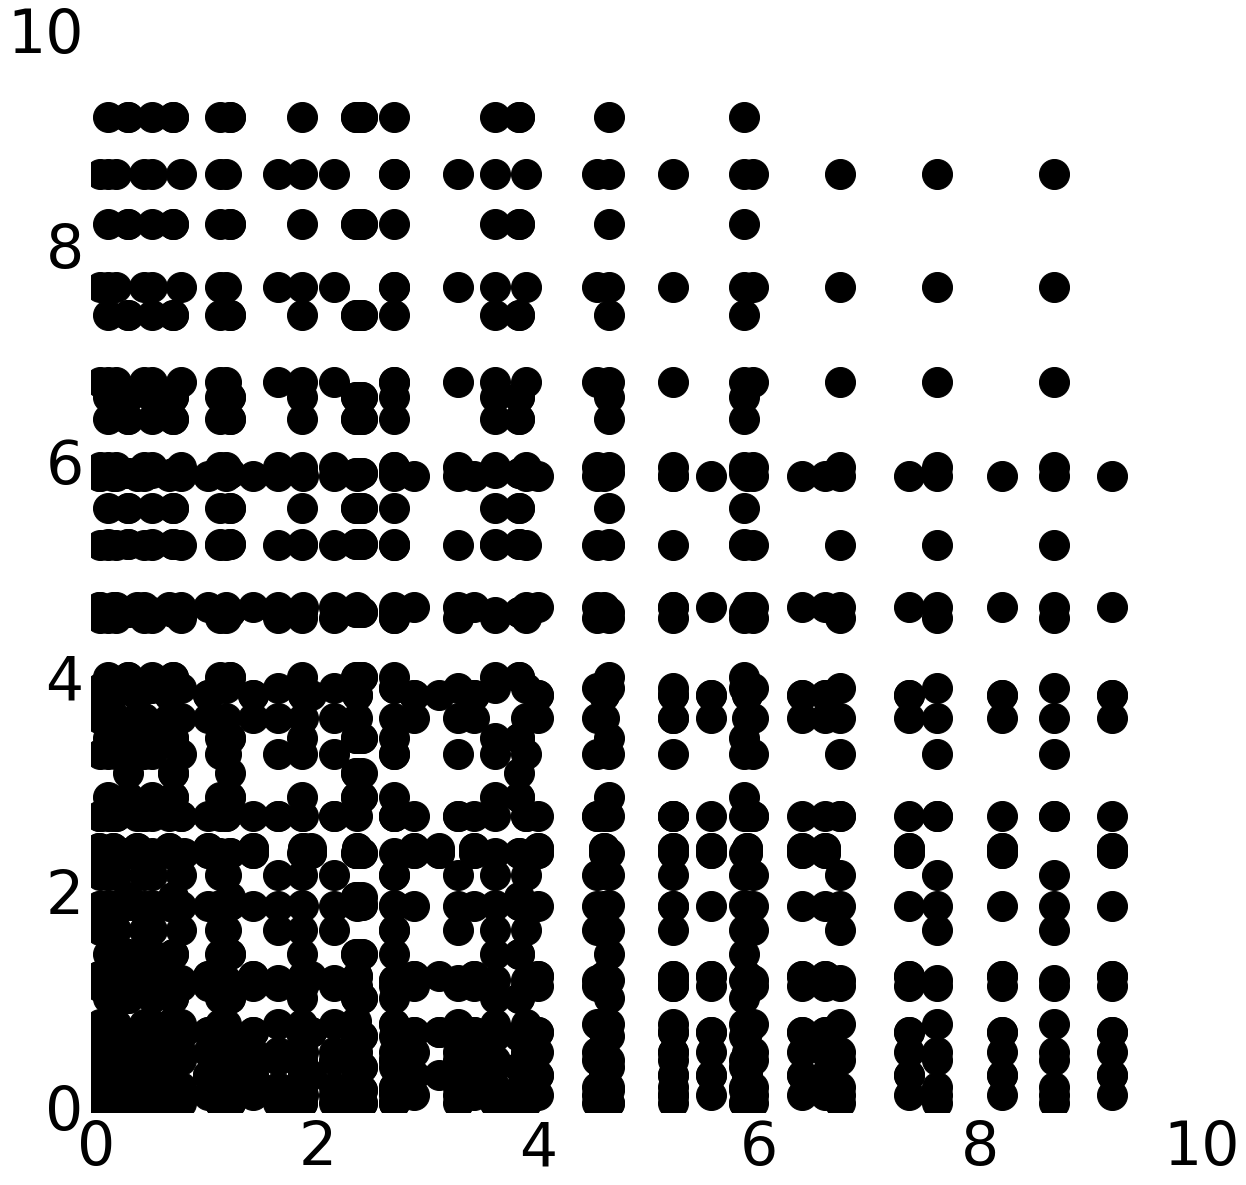

In [3]:
%matplotlib inline
from sys import path
path.append('../src/')

from Function import *
from StandardCombi import *
from Grid import *
import numpy as np
dim = 2
coeffs = np.ones(dim)
a = np.ones(dim) * 0
b = np.ones(dim) * 10
mean = np.ones(dim)
std_dev = np.ones(dim)
grid = TruncatedNormalDistributionGrid(a=a,b=b, mean=mean, std_dev=std_dev)

model = FunctionUQNormal2(FunctionUQ2(), mean, std_dev, a, b)
# NEW! define operation which shall be performed in the combination technique
from GridOperation import *
operation = Integration(f=model, grid=grid, dim=dim, reference_solution = model.getAnalyticSolutionIntegral(a,b))
combiObject = StandardCombi(a, b, operation=operation)
minimum_level = 1
maximum_level = 7
combiObject.perform_combi(minimum_level, maximum_level, model)
combiObject.print_resulting_combi_scheme()
combiObject.print_resulting_sparsegrid()
